In [1]:
import pathlib
import IPython.display as display
import scipy.io as sio 
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
import random
import os
import glob
from itertools import product
import pandas as pd
import numpy as np

# Load CSV

In [2]:
df = pd.read_csv("train_relationships.csv")

# Split Train X,y

In [3]:
parents_path =[("./train/"+row)for row in df["p1"]]
childs_path =[("./train/"+row)for row in df["p2"]]

In [4]:
df.iloc[121:133]

,p1,p2
121,F0038/MID1,F0038/MID4
122,F0038/MID1,F0038/MID6
123,F0038/MID2,F0038/MID4
124,F0038/MID3,F0038/MID6
125,F0038/MID3,F0038/MID5
126,F0038/MID5,F0038/MID6
127,F0039/MID1,F0039/MID4
128,F0039/MID1,F0039/MID3
129,F0040/MID1,F0040/MID3
130,F0041/MID1,F0041/MID6


# Product n of Parent * child

In [6]:
dataset_path=[]


def prep_load_map(parents_path,childs_path):
    trainX=[]
    trainY=[]
    for  x,y  in zip(parents_path,childs_path):
        parents = [ ".\\"+str(filename) for filename  in pathlib.Path(x).glob('*.jpg')]
        childs = [ ".\\"+str(filename) for filename  in pathlib.Path(y).glob('*.jpg')]
        family = list(product(parents,childs))
        if len(parents)==0 or len(childs)==0:
            print("NOT FOUND parent {0} child {1}   {2} and {3}".format(len(parents),len(childs),str(x),str(y)))
            continue
            # data set link broken
        parent , child = zip(*family)

        #print("\n")
        trainX.extend(parent)
        trainY.extend(child)
    print(len(trainX), len(trainY))
    return trainX,trainY


trainX,trainY = prep_load_map(parents_path,childs_path)


NOT FOUND parent 4 child 0   ./train/F0039/MID1 and ./train/F0039/MID3
NOT FOUND parent 13 child 0   ./train/F0041/MID1 and ./train/F0041/MID7
NOT FOUND parent 0 child 2   ./train/F0041/MID3 and ./train/F0041/MID4
NOT FOUND parent 0 child 0   ./train/F0041/MID5 and ./train/F0041/MID7
NOT FOUND parent 0 child 5   ./train/F0051/MID5 and ./train/F0051/MID1
NOT FOUND parent 0 child 1   ./train/F0051/MID5 and ./train/F0051/MID3
NOT FOUND parent 0 child 4   ./train/F0051/MID5 and ./train/F0051/MID4
NOT FOUND parent 0 child 6   ./train/F0058/MID2 and ./train/F0058/MID4
NOT FOUND parent 0 child 1   ./train/F0058/MID2 and ./train/F0058/MID5
NOT FOUND parent 0 child 14   ./train/F0058/MID2 and ./train/F0058/MID1
NOT FOUND parent 8 child 0   ./train/F0070/MID1 and ./train/F0070/MID3
NOT FOUND parent 8 child 0   ./train/F0070/MID2 and ./train/F0070/MID3
NOT FOUND parent 0 child 2   ./train/F0070/MID3 and ./train/F0070/MID4
NOT FOUND parent 0 child 3   ./train/F0070/MID3 and ./train/F0070/MID5
NOT 

NOT FOUND parent 0 child 5   ./train/F0438/MID4 and ./train/F0438/MID6
NOT FOUND parent 0 child 4   ./train/F0438/MID4 and ./train/F0438/MID7
NOT FOUND parent 0 child 15   ./train/F0438/MID4 and ./train/F0438/MID1
NOT FOUND parent 0 child 14   ./train/F0438/MID4 and ./train/F0438/MID3
NOT FOUND parent 0 child 14   ./train/F0438/MID4 and ./train/F0438/MID2
NOT FOUND parent 18 child 0   ./train/F0439/MID1 and ./train/F0439/MID8
NOT FOUND parent 5 child 0   ./train/F0439/MID3 and ./train/F0439/MID8
NOT FOUND parent 6 child 0   ./train/F0439/MID4 and ./train/F0439/MID8
NOT FOUND parent 1 child 0   ./train/F0439/MID7 and ./train/F0439/MID8
NOT FOUND parent 0 child 1   ./train/F0439/MID8 and ./train/F0439/MID9
NOT FOUND parent 8 child 0   ./train/F0446/MID1 and ./train/F0446/MID6
NOT FOUND parent 5 child 0   ./train/F0446/MID2 and ./train/F0446/MID6
NOT FOUND parent 3 child 0   ./train/F0446/MID3 and ./train/F0446/MID6
NOT FOUND parent 3 child 0   ./train/F0446/MID4 and ./train/F0446/MID6
NO

# Shuffle Dataset

In [7]:
temp = list(zip(trainX, trainY))
print([i for i in temp[30]])
np.random.shuffle(temp)
print([i for i in temp[30]])
trainX,trainY =zip(*temp)


['.\\train\\F0002\\MID1\\P00012_face2.jpg', '.\\train\\F0002\\MID3\\P00017_face1.jpg']
['.\\train\\F0754\\MID3\\P07965_face2.jpg', '.\\train\\F0754\\MID5\\P07951_face3.jpg']


# Observe Random Sample

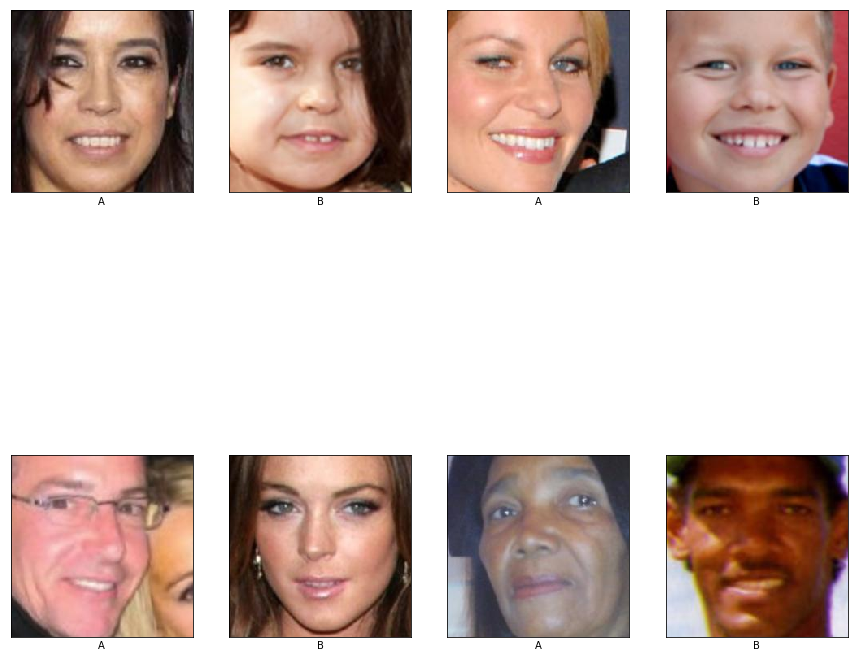

In [8]:
plt.figure(figsize=(15,15))
col = 1
for n in range(4):
    index = random.choice(range(len(trainX)))
    a = trainX[index]
    b = trainY[index]
    plt.subplot(2,4,col)
    a = cv2.cvtColor(cv2.imread(a ), cv2.COLOR_BGR2RGB)
    plt.imshow(a)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("A")
    col=col+1

    b = cv2.cvtColor(cv2.imread(b ), cv2.COLOR_BGR2RGB)
    plt.subplot(2,4,col)
    plt.imshow(b)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("B")
    col=col+1

# Reshape (n,2) to n,3

In [18]:
temp = np.array(list(zip(trainX, trainY)))
print(temp.shape)
true_positive = np.append(temp, np.ones((temp.shape[0],1), dtype=int), axis=1)

(165179, 2)


# generate negative (false positive)

In [19]:

parents_path.sort(reverse = True) 
n_trainX,n_trainY = prep_load_map(parents_path,childs_path)
temp = np.array(list(zip(n_trainX, n_trainY)))
false_positive = np.append(temp, np.zeros((temp.shape[0],1), dtype=int), axis=1)

NOT FOUND parent 4 child 0   ./train/F0977/MID3 and ./train/F0039/MID3
NOT FOUND parent 8 child 0   ./train/F0977/MID1 and ./train/F0041/MID7
NOT FOUND parent 8 child 0   ./train/F0977/MID1 and ./train/F0041/MID7
NOT FOUND parent 4 child 0   ./train/F0955/MID5 and ./train/F0070/MID3
NOT FOUND parent 1 child 0   ./train/F0955/MID3 and ./train/F0070/MID3
NOT FOUND parent 6 child 0   ./train/F0944/MID3 and ./train/F0081/MID3
NOT FOUND parent 9 child 0   ./train/F0942/MID1 and ./train/F0091/MID5
NOT FOUND parent 7 child 0   ./train/F0939/MID1 and ./train/F0091/MID5
NOT FOUND parent 8 child 0   ./train/F0933/MID4 and ./train/F0091/MID5
NOT FOUND parent 8 child 0   ./train/F0933/MID3 and ./train/F0091/MID5
NOT FOUND parent 9 child 0   ./train/F0915/MID1 and ./train/F0101/MID11
NOT FOUND parent 10 child 0   ./train/F0872/MID1 and ./train/F0129/MID7
NOT FOUND parent 3 child 0   ./train/F0868/MID3 and ./train/F0129/MID8
NOT FOUND parent 8 child 0   ./train/F0863/MID1 and ./train/F0129/MID7
NOT 

NOT FOUND parent 0 child 19   ./train/F0423/MID6 and ./train/F0601/MID33
NOT FOUND parent 2 child 0   ./train/F0423/MID5 and ./train/F0601/MID38
NOT FOUND parent 1 child 0   ./train/F0408/MID3 and ./train/F0625/MID5
NOT FOUND parent 8 child 0   ./train/F0408/MID1 and ./train/F0625/MID6
NOT FOUND parent 5 child 0   ./train/F0403/MID2 and ./train/F0625/MID6
NOT FOUND parent 3 child 0   ./train/F0378/MID4 and ./train/F0658/MID8
NOT FOUND parent 12 child 0   ./train/F0376/MID8 and ./train/F0658/MID8
NOT FOUND parent 4 child 0   ./train/F0376/MID7 and ./train/F0658/MID8
NOT FOUND parent 3 child 0   ./train/F0376/MID5 and ./train/F0658/MID8
NOT FOUND parent 10 child 0   ./train/F0376/MID4 and ./train/F0658/MID8
NOT FOUND parent 7 child 0   ./train/F0367/MID3 and ./train/F0670/MID3
NOT FOUND parent 3 child 0   ./train/F0367/MID2 and ./train/F0670/MID3
NOT FOUND parent 0 child 12   ./train/F0363/MID4 and ./train/F0673/MID3
NOT FOUND parent 8 child 0   ./train/F0359/MID1 and ./train/F0678/MID3


In [20]:
ds =  np.append(true_positive,false_positive, axis=0)
ds.shape

(277483, 3)

In [24]:
np.random.shuffle(ds) ## shuffle


In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Concatenate, GlobalMaxPool2D,Dropout,Multiply,Dense,GlobalAvgPool2D 
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

In [60]:
def model():
    input_1 = Input(shape=(224, 224, 3))
    input_2 = Input(shape=(224, 224, 3))
    base_model = ResNet50(weights='imagenet', include_top=False)
    for x in base_model.layers[:-3]:
        x.trainable = True
    l1 =base_model(input_1)
    l2 =base_model(input_2)
    l1 = Concatenate(axis=-1)([GlobalMaxPool2D()(l1), GlobalAvgPool2D()(l1)])
    l2 = Concatenate(axis=-1)([GlobalMaxPool2D()(l2), GlobalAvgPool2D()(l2)])
    #l3 = Subtract()([l1, l2])
    l3 = tf.subtract(l1, l2)
    l3 = Multiply()([l3, l3])
    l4 = Multiply()([l1, l2])
    l4 = Concatenate(axis=-1)([l4, l3])
    
    l4 = Dense(100, activation="relu")(l4)
    l4 = Dropout(0.01)(l4)
    out = Dense(1, activation="sigmoid")(l4)

    model = Model(input=[input_1, input_2],output= out)

    model.compile(loss="binary_crossentropy", metrics=['acc'], optimizer=Adam())

    model.summary()

    return model

In [61]:
model = model()

TypeError: _init_subclassed_network() got an unexpected keyword argument 'input'

In [ ]:
model.fit([ds[],], labels, epochs=10, batch_size=32)